# Exercise solutions

## Exercise 1

A) Write a program implementing a linear congruential generator (LCG). Be sure that the program works correctly using only integer representation.

**Linear Congruential Generator (LCG)**

An LCG has the form:

$$
X_{n+1} = (a \cdot X_n + c) \mod m
$$

Where:

- \( a \): multiplier  
- \( c \): shift 
- \( m \): modulus  
- \( X_0 \): initial value (seed)


In [40]:
# Linear Congruential Generator (LCG) implementation
def lcg(n, a, c, m, seed=seed):
    x = seed
    numbers = []
    for _ in range(n):
        x = (a * x + c) % m
        numbers.append(x / m)  # Normaliser til [0,1)
    return numbers


# Histogram of generated numbers
def histogram_data(numbers, num_bins, min_val, max_val):
    bin_width = (max_val - min_val) / num_bins
    hist_counts = [0] * num_bins
    
    for val in numbers:
        bin_index = int((val - min_val) / bin_width)
        if bin_index >= num_bins:  # Clamp to last bin if val == 1.0 (rare but safe)
            bin_index = num_bins - 1
        hist_counts[bin_index] += 1
    
    return hist_counts

def histogram_plot(num_bins, min_val, max_val, hist_counts):
    bin_width = (max_val - min_val) / num_bins
    histogram_text = ""
    
    for i in range(num_bins):
        start = min_val + i * bin_width
        end = start + bin_width
        bar = '█' * int((hist_counts[i] / max(hist_counts)) * 40)
        label = f"[{start:.1f}, {end:.1f})"
        histogram_text += f"{label.ljust(14)} | {bar} ({hist_counts[i]})\n"
    
    return histogram_text



In [41]:
#Parameters

# Constants for LCG
a = 5
c = 1
m = 16
n = 10000
seed = 237

# Parameters for [0,1) interval
num_bins = 10
min_val = 0.0
max_val = 1.0
bin_width = (max_val - min_val) / num_bins

# Initialize bins
hist_counts = [0] * num_bins


In [42]:
#Run the LCG and generate numbers
# Generate 10000 random numbers
numbers = lcg(n, a, c, m, seed)

# Generate histogram data
hist_counts = histogram_data(numbers, num_bins, min_val, max_val)

# Generate histogram plot
histogram_text = histogram_plot(num_bins, min_val, max_val, hist_counts)

# Print the histogram
print("Histogram of LCG-generated numbers:")
print(histogram_text)

Histogram of LCG-generated numbers:
[0.0, 0.1)     | ████████████████████████████████████████ (1250)
[0.1, 0.2)     | ████████████████████████████████████████ (1250)
[0.2, 0.3)     | ████████████████████ (625)
[0.3, 0.4)     | ████████████████████████████████████████ (1250)
[0.4, 0.5)     | ████████████████████ (625)
[0.5, 0.6)     | ████████████████████████████████████████ (1250)
[0.6, 0.7)     | ████████████████████████████████████████ (1250)
[0.7, 0.8)     | ████████████████████ (625)
[0.8, 0.9)     | ████████████████████████████████████████ (1250)
[0.9, 1.0)     | ████████████████████ (625)



#### B

Evaluate the quality of the generator by graphical descriptive statistics (histogrammes, scatter plots) and statistical tests- χ2,Kolmogorov-Smirnov, run-tests preferably but not necessarily all 3, and correlation test forsome h-values.

In [43]:
# Show 20 x_i
def show_numbers(numbers):
    print("First 20 generated numbers:")
    print(" i     X_i     ")
    print("--------------")
    for i in range(20):
        xi = round(numbers[i], 4)
        print(f"{i:<5} {xi:<10} ")

show_numbers(numbers)


First 20 generated numbers:
 i     X_i     
--------------
0     0.125      
1     0.6875     
2     0.5        
3     0.5625     
4     0.875      
5     0.4375     
6     0.25       
7     0.3125     
8     0.625      
9     0.1875     
10    0.0        
11    0.0625     
12    0.375      
13    0.9375     
14    0.75       
15    0.8125     
16    0.125      
17    0.6875     
18    0.5        
19    0.5625     


#### Chi_squared test

In [44]:
def chi_squared_test(hist_counts, num_bins):
    """
    Perform a chi-squared test on the histogram counts.
    """
    expected = len(numbers) // num_bins
    chi_squared = 0
    df = num_bins - 1  # degrees of freedom
    for observed in hist_counts:
        chi_squared += ((observed - expected) ** 2) / expected
        
    return chi_squared, df

chi_squared, df = chi_squared_test(hist_counts, num_bins)

print(f"\nChi-squared statistic: {chi_squared:.2f}")
print(f"Degrees of freedom: {df}")



Chi-squared statistic: 937.50
Degrees of freedom: 9


#### Correlation test

In [45]:
def lag_correlation(U, h=1):
    n = len(U)
    return sum(U[i] * U[i + h] for i in range(n - h)) / (n - h)

ch = lag_correlation(numbers, h=1)
print(f"Estimated c₁ = {ch:.5f}")


Estimated c₁ = 0.24220


#### Kolmogorov Smirnov test

In [46]:
def ks_test_uniform(data):
    n = len(data)
    sorted_data = sorted(data)

    # Compute empirical CDF and compare with theoretical CDF
    D_plus = max((i + 1) / n - val for i, val in enumerate(sorted_data))
    D_minus = max(val - i / n for i, val in enumerate(sorted_data))

    Dn = max(D_plus, D_minus)
    return Dn

def ks_critical_value(alpha=0.05, n=10000):
    # Critical value constant for alpha = 0.05
    c_alpha = 1.36
    return c_alpha / (n ** 0.5)


In [47]:
# ks test
Dn = ks_test_uniform(numbers)
D_crit = ks_critical_value(0.05, len(numbers))

print(f"KS Statistic: {Dn:.5f}")
print(f"Critical value (alpha=0.05): {D_crit:.5f}")

if Dn > D_crit:
    print("Reject null hypothesis: sample is not uniform.")
else:
    print("Fail to reject null hypothesis: sample appears uniform.")

KS Statistic: 0.06250
Critical value (alpha=0.05): 0.01360
Reject null hypothesis: sample is not uniform.


#### Run test I

In [48]:
import numpy as np
from math import sqrt

def run_test_above_below(data):
    median = np.median(data)
    
    # Step 1: Convert to binary sequence: 1 if above median, 0 if below
    signs = [1 if x > median else 0 for x in data]
    
    # Step 2: Count runs (change between 0 and 1)
    runs = 1  # first element starts the first run
    for i in range(1, len(signs)):
        if signs[i] != signs[i - 1]:
            runs += 1

    n1 = signs.count(1)  # number above median
    n2 = signs.count(0)  # number below median

    if n1 == 0 or n2 == 0:
        return runs, None, None, "Not enough variation to perform test"

    # Step 3: Calculate expected value and variance under H0
    expected_runs = 2 * n1 * n2 / (n1 + n2) + 1
    variance_runs = (
        2 * n1 * n2 * (2 * n1 * n2 - n1 - n2)
        / ((n1 + n2) ** 2 * (n1 + n2 - 1))
    )

    # Step 4: Compute Z-score
    z = (runs - expected_runs) / sqrt(variance_runs)

    return runs, expected_runs, z, None


In [49]:
# Run the test
runs, expected, z, warning = run_test_above_below(numbers)

print(f"Observed number of runs: {runs}")
print(f"Expected number of runs: {expected:.2f}")
print(f"Z-score: {z:.3f}" if z is not None else warning)

# Interpret result
if z is not None:
    if abs(z) > 1.96:
        print("Reject null hypothesis: evidence of non-randomness.")
    else:
        print("Fail to reject null hypothesis: runs appear random.")


Observed number of runs: 3750
Expected number of runs: 5001.00
Z-score: -25.021
Reject null hypothesis: evidence of non-randomness.


#### Run test II

In [50]:
import numpy as np

def run_test_knuth(data):
    n = len(data)

    # Step 1: Count run lengths
    run_lengths = []
    current_run = 1
    for i in range(1, n):
        if data[i] > data[i - 1]:
            current_run += 1
        else:
            run_lengths.append(current_run)
            current_run = 1
    run_lengths.append(current_run)  # include final run

    # Step 2: Build vector R (run count for length 1-5, and 6+)
    R = np.zeros(6)
    for length in run_lengths:
        if length >= 6:
            R[5] += 1
        else:
            R[length - 1] += 1

    # Step 3: Define A matrix (6x6) and B vector (6x1)
    A = np.array([
        [4529.4, 9044.9, 13568, 18091, 22615, 27892],
        [9044.9, 18097, 27139, 36187, 45234, 55789],
        [13568, 27139, 40721, 54281, 67852, 83685],
        [18091, 36187, 54281, 72414, 90470, 111580],
        [22615, 45234, 67852, 90470, 113262, 139476],
        [27892, 55789, 83685, 111580, 139476, 172860]
    ])

    B = np.array([1/6, 5/24, 11/120, 19/720, 29/5040, 1/840])

    # Step 4: Compute test statistic Z
    diff = R - n * B
    Z = (1 / (n - 6)) * diff @ A @ diff.T
    return Z, R


In [51]:
# Perform the run test
Z, R = run_test_knuth(numbers)

print(f"Z-statistic: {Z:.3f}")
print("Run counts (lengths 1–5, 6+):", R.astype(int))

# Interpret using chi-square distribution with 6 degrees of freedom
from scipy.stats import chi2
p_value = 1 - chi2.cdf(Z, df=6)
print(f"p-value: {p_value:.4f}")


Z-statistic: 1118.827
Run counts (lengths 1–5, 6+): [1250 1250 1250  625    0    0]
p-value: 0.0000


#### Run test III

In [52]:
def up_down_test(data):
    if len(data) < 2:
        return None, None

    # Step 1: Convert data to up/down sequence: 1 for up, -1 for down, 0 for equal
    directions = []
    for i in range(1, len(data)):
        if data[i] > data[i - 1]:
            directions.append(1)
        elif data[i] < data[i - 1]:
            directions.append(-1)

    # Step 2: Count runs in the direction sequence
    if not directions:
        return 0, 0

    runs = 1
    for i in range(1, len(directions)):
        if directions[i] != directions[i - 1]:
            runs += 1

    # Step 3: Compute expected value and variance
    n = len(directions) + 1  # original sample length
    expected = (2 * n - 1) / 3
    variance = (16 * n - 29) / 90

    # Step 4: Compute Z-score
    z = (runs - expected) / sqrt(variance)

    return z, runs


In [53]:
z, total_runs = up_down_test(numbers)
print(f"Number of up/down runs: {total_runs}")
print(f"Z-score: {z:.4f}")

# Optional interpretation
if abs(z) > 1.96:
    print("Reject null hypothesis: sequence shows non-random behavior.")
else:
    print("Fail to reject null hypothesis: no evidence against randomness.")


Number of up/down runs: 6249
Z-score: -9.8988
Reject null hypothesis: sequence shows non-random behavior.


#### c) Experimenting with different values of “a”, “c” and “M ”.

In [ ]:
def lcg_and_tests(n, a, c, m, seed=seed):
    """
    Generate n random numbers using LCG and perform various tests.
    """
    # Generate numbers
    numbers = lcg(n,a, c, m, seed)

    # Histogram data
    hist_counts = histogram_data(numbers, num_bins, min_val, max_val)
    histogram_text = histogram_plot(num_bins, min_val, max_val, hist_counts)

    # Chi-squared test
    chi_squared, df = chi_squared_test(hist_counts, num_bins)

    # Lag-1 correlation
    ch = lag_correlation(numbers, h=1)

    # KS test
    Dn = ks_test_uniform(numbers)
    D_crit = ks_critical_value(0.05, len(numbers))

    # Run test above/below median
    runs, expected, z, warning = run_test_above_below(numbers)

    # Run test Knuth
    Z, R = run_test_knuth(numbers)

    # Up/Down test
    z_up_down, total_runs = up_down_test(numbers)

    return {
        "numbers": numbers,
        "histogram_text": histogram_text,
        "chi_squared": chi_squared,
        "df": df,
        "ch": ch,
        "Dn": Dn,
        "D_crit": D_crit,
        "runs": runs,
        "expected_runs": expected,
        "z_runs": z,
        "warning_runs": warning,
        "Z_knuth": Z,
        "R_knuth": R,
        "z_up_down": z_up_down,
        "total_runs_up_down": total_runs
    }

# Print results
def print_results(results):
    """
    Print the results of the LCG and statistical tests.
    """
    print("Results of LCG and statistical tests:")
    print("======================================")
    print("Histogram of LCG-generated numbers:")
    print(results["histogram_text"])
    show_numbers(results["numbers"])
    print(f"\nChi-squared statistic: {results['chi_squared']:.2f}")
    print(f"Degrees of freedom: {results['df']}")
    print(f"Estimated c₁ = {results['ch']:.5f}")
    print(f"KS Statistic: {results['Dn']:.5f}")
    print(f"Critical value (alpha=0.05): {results['D_crit']:.5f}")
    if results["Dn"] > results["D_crit"]:
        print("Reject null hypothesis: sample is not uniform.")
    else:
        print("Fail to reject null hypothesis: sample appears uniform.")
    print(f"Observed number of runs: {results['runs']}")
    print(f"Expected number of runs: {results['expected_runs']:.2f}")
    if results["z_runs"] is not None:
        print(f"Z-score for runs: {results['z_runs']:.3f}")
    else:
        print(results["warning_runs"])
    print(f"Z-statistic (Knuth): {results['Z_knuth']:.3f}")
    print("Run counts (lengths 1–5, 6+):", results["R_knuth"].astype(int))
    p_value = 1 - chi2.cdf(results["Z_knuth"], df=6)
    print(f"p-value (Knuth): {p_value:.4f}")
    if results["z_up_down"] is not None:
        print(f"Z-score for up/down runs: {results['z_up_down']:.4f}")
        if abs(results["z_up_down"]) > 1.96:
            print("Reject null hypothesis: sequence shows non-random behavior.")
        else:
            print("Fail to reject null hypothesis: no evidence against randomness.")
        print(f"Total up/down runs: {results['total_runs_up_down']}")


In [ ]:
#Experiments 
#New parameters for new LCG 
#The old ones in a factor of 5
a = 50000
c = 10000
m = 160000
seed = 3112

# Run the LCG and tests with new parameters
results_1 = lcg_and_tests(10000, a, c, m, seed)
# Print results for first set of parameters
print_results(results_1)

Results of LCG and statistical tests:
Histogram of LCG-generated numbers:
[0.0, 0.1)     | ████████████████████████████████████████ (9999)
[0.1, 0.2)     |  (0)
[0.2, 0.3)     |  (0)
[0.3, 0.4)     |  (0)
[0.4, 0.5)     |  (0)
[0.5, 0.6)     |  (1)
[0.6, 0.7)     |  (0)
[0.7, 0.8)     |  (0)
[0.8, 0.9)     |  (0)
[0.9, 1.0)     |  (0)

First 20 generated numbers:
 i     X_i     
--------------
0     0.5625     
1     0.0625     
2     0.0625     
3     0.0625     
4     0.0625     
5     0.0625     
6     0.0625     
7     0.0625     
8     0.0625     
9     0.0625     
10    0.0625     
11    0.0625     
12    0.0625     
13    0.0625     
14    0.0625     
15    0.0625     
16    0.0625     
17    0.0625     
18    0.0625     
19    0.0625     

Chi-squared statistic: 89980.00
Degrees of freedom: 9
Estimated c₁ = 0.00391
KS Statistic: 0.93740
Critical value (alpha=0.05): 0.01360
Reject null hypothesis: sample is not uniform.
Observed number of runs: 2
Expected number of runs: 3.00
Z-

In [69]:
# New parameters for second LCG
# Litterature values for LCG
a = 1664525
c = 101390
m = 2**32
seed = 123

# Run the LCG and tests with second set of parameters
results_2 = lcg_and_tests(10000, a, c, m, seed)
# Print results for second set of parameters
print("\nResults for second set of parameters:")
print_results(results_2)


Results for second set of parameters:
Results of LCG and statistical tests:
Histogram of LCG-generated numbers:
[0.0, 0.1)     | ██████████████████████████████████ (961)
[0.1, 0.2)     | ███████████████████████████████████ (985)
[0.2, 0.3)     | █████████████████████████████████████ (1042)
[0.3, 0.4)     | ███████████████████████████████████ (979)
[0.4, 0.5)     | ███████████████████████████████████ (980)
[0.5, 0.6)     | █████████████████████████████████ (936)
[0.6, 0.7)     | ████████████████████████████████████████ (1107)
[0.7, 0.8)     | █████████████████████████████████████ (1025)
[0.8, 0.9)     | ███████████████████████████████████ (995)
[0.9, 1.0)     | ███████████████████████████████████ (990)

First 20 generated numbers:
 i     X_i     
--------------
0     0.0477     
1     0.4505     
2     0.9678     
3     0.8735     
4     0.3851     
5     0.3921     
6     0.846      
7     0.36       
8     0.9939     
9     0.1155     
10    0.5604     
11    0.2275     
12    0.2554

#### Øvelse 1.2

In [55]:
import random

sim_numbers = [random.random() for _ in range(10000)]

In [56]:
# Parameters for [0,1) interval
num_bins = 10
min_val = 0.0
max_val = 1.0
bin_width = (max_val - min_val) / num_bins

# Initialize bins
hist_counts = [0] * num_bins

# Count occurrences in each bin
for val in sim_numbers:
    bin_index = int((val - min_val) / bin_width)
    if bin_index >= num_bins:  # Clamp to last bin if val == 1.0 (rare but safe)
        bin_index = num_bins - 1
    hist_counts[bin_index] += 1

# Determine max count for scaling
max_count = max(hist_counts)

# Build text histogram
histogram_text = ""
for i in range(num_bins):
    start = min_val + i * bin_width
    end = start + bin_width
    bar = '█' * int((hist_counts[i] / max_count) * 40)
    label = f"[{start:.1f}, {end:.1f})"
    histogram_text += f"{label.ljust(14)} | {bar} ({hist_counts[i]})\n"

print(histogram_text)

[0.0, 0.1)     | █████████████████████████████████████ (979)
[0.1, 0.2)     | ████████████████████████████████████ (946)
[0.2, 0.3)     | ██████████████████████████████████████ (1012)
[0.3, 0.4)     | ███████████████████████████████████████ (1032)
[0.4, 0.5)     | ██████████████████████████████████████ (993)
[0.5, 0.6)     | ███████████████████████████████████████ (1032)
[0.6, 0.7)     | ███████████████████████████████████████ (1026)
[0.7, 0.8)     | ██████████████████████████████████████ (997)
[0.8, 0.9)     | ████████████████████████████████████ (945)
[0.9, 1.0)     | ████████████████████████████████████████ (1038)



In [57]:
# Not nessary to show 20 x_i for simulated numbers, but can be done similarly?!?
# Show 20 x_i 
print(" i     X_i     ")
print("--------------")
for i in range(20):
    xi = round(numbers[i], 4)
    print(f"{i:<5} {xi:<10} ")


 i     X_i     
--------------
0     0.125      
1     0.6875     
2     0.5        
3     0.5625     
4     0.875      
5     0.4375     
6     0.25       
7     0.3125     
8     0.625      
9     0.1875     
10    0.0        
11    0.0625     
12    0.375      
13    0.9375     
14    0.75       
15    0.8125     
16    0.125      
17    0.6875     
18    0.5        
19    0.5625     


#### Chi_squared for sim_numbers

In [58]:
expected = len(sim_numbers) // num_bins
chi_squared = 0
for observed in hist_counts:
    chi_squared += ((observed - expected) ** 2) / expected

print(f"\nChi-squared statistic: {chi_squared:.2f}")


Chi-squared statistic: 10.75


#### KS-test

In [59]:
# Run test
Dn = ks_test_uniform(sim_numbers)
D_crit = ks_critical_value(0.05, len(sim_numbers))

print(f"KS Statistic: {Dn:.5f}")
print(f"Critical value (alpha=0.05): {D_crit:.5f}")

if Dn > D_crit:
    print("Reject null hypothesis: sample is not uniform.")
else:
    print("Fail to reject null hypothesis: sample appears uniform.")

KS Statistic: 0.00954
Critical value (alpha=0.05): 0.01360
Fail to reject null hypothesis: sample appears uniform.


#### Correlation test

In [60]:
ch = lag_correlation(sim_numbers, h=1)
print(f"Estimated c₁ = {ch:.5f}")

Estimated c₁ = 0.25211


In [61]:
# Run test 1

# Run the test
runs, expected, z, warning = run_test_above_below(sim_numbers)

print(f"Observed number of runs: {runs}")
print(f"Expected number of runs: {expected:.2f}")
print(f"Z-score: {z:.3f}" if z is not None else warning)

# Interpret result
if z is not None:
    if abs(z) > 1.96:
        print("Reject null hypothesis: evidence of non-randomness.")
    else:
        print("Fail to reject null hypothesis: runs appear random.")

Observed number of runs: 5009
Expected number of runs: 5001.00
Z-score: 0.160
Fail to reject null hypothesis: runs appear random.


In [62]:
# Run test 2

# Perform the run test
Z, R = run_test_knuth(sim_numbers)

print(f"Z-statistic: {Z:.3f}")
print("Run counts (lengths 1–5, 6+):", R.astype(int))

# Interpret using chi-square distribution with 6 degrees of freedom
from scipy.stats import chi2
p_value = 1 - chi2.cdf(Z, df=6)
print(f"p-value: {p_value:.4f}")

Z-statistic: 5.525
Run counts (lengths 1–5, 6+): [1674 2059  956  248   54   13]
p-value: 0.4784


In [63]:
# Run test 3

z, total_runs = up_down_test(sim_numbers)
print(f"Number of up/down runs: {total_runs}")
print(f"Z-score: {z:.4f}")

# Optional interpretation
if abs(z) > 1.96:
    print("Reject null hypothesis: sequence shows non-random behavior.")
else:
    print("Fail to reject null hypothesis: no evidence against randomness.")

Number of up/down runs: 6660
Z-score: -0.1502
Fail to reject null hypothesis: no evidence against randomness.


## Exercise 2

#### Øvelse 1

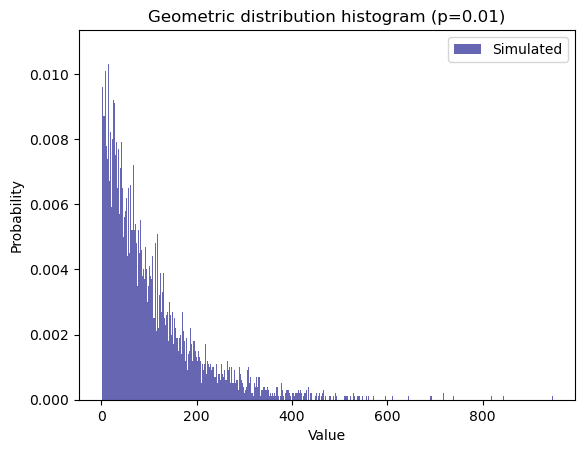

p = 0.01
Chi-square test p-value: 0.4279
Kolmogorov-Smirnov test p-value: 0.0076
----------------------------------------


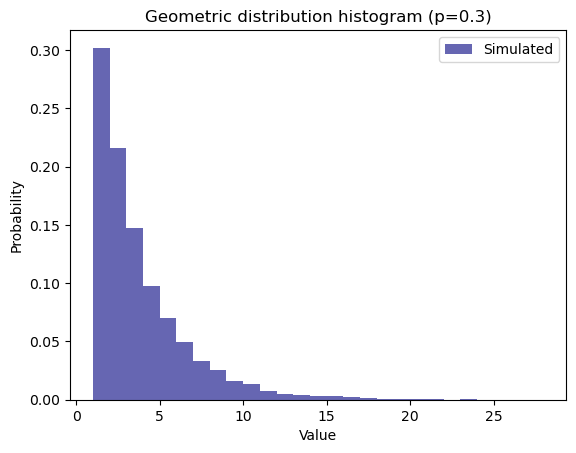

p = 0.3
Chi-square test p-value: 0.4208
Kolmogorov-Smirnov test p-value: 0.0000
----------------------------------------


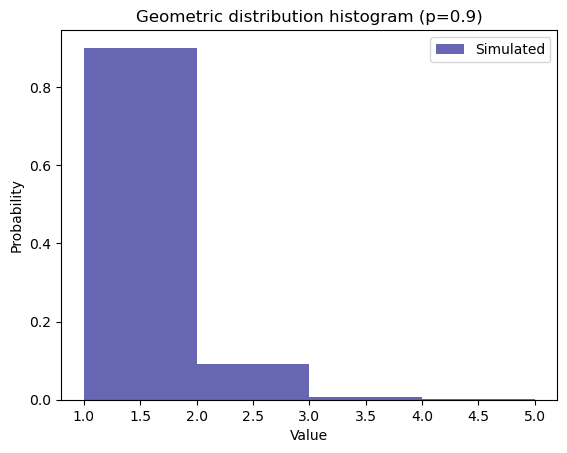

p = 0.9
Chi-square test p-value: 0.6652
Kolmogorov-Smirnov test p-value: 0.0000
----------------------------------------


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom, chisquare, kstest

np.random.seed(237)
p_values = [0.01, 0.3, 0.9]

for p in p_values:
    samples = np.random.geometric(p, size=10000)

    # Histogram
    plt.figure()
    plt.hist(samples, bins=range(1, np.max(samples)+1), density=True, alpha=0.6, color='navy', label='Simulated')
    
    k = np.arange(1, np.max(samples)+1)
    theoretical_pmf = geom.pmf(k, p)
    #plt.plot(k, theoretical_pmf, '-', label='Theoretical', linewidth=1, color='darkred')
    
    plt.title(f'Geometric distribution histogram (p={p})')
    plt.xlabel('Value')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

    # Chi-square test
    observed_counts, _ = np.histogram(samples, bins=range(1, np.max(samples)+2))
    expected_counts = geom.pmf(k, p) * len(samples)

    # Align lengths and apply threshold for expected counts > 5
    valid = expected_counts > 5
    obs_valid = observed_counts[valid]
    exp_valid = expected_counts[valid]

    # Rescale expected to match observed sum
    exp_valid = exp_valid * obs_valid.sum() / exp_valid.sum()

    chi_stat, chi_p = chisquare(f_obs=obs_valid, f_exp=exp_valid)

    # KS test (compare with CDF directly)
    ks_stat, ks_p = kstest(samples, geom(p).cdf)

    print(f"p = {p}")
    print(f"Chi-square test p-value: {chi_p:.4f}")
    print(f"Kolmogorov-Smirnov test p-value: {ks_p:.4f}")
    print("-" * 40)


#### Øvelse 2a

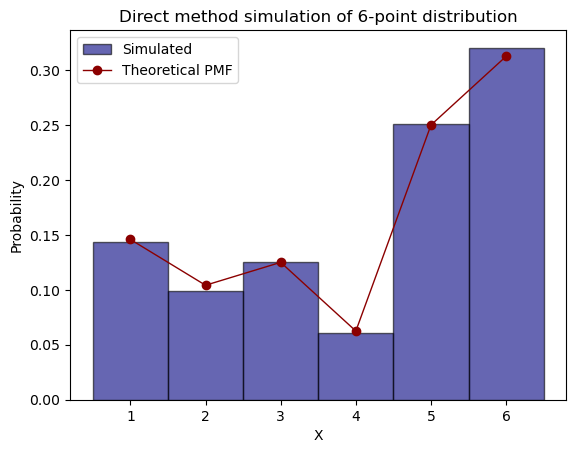

Chi-square test:
Statistic = 5.3755
p-value   = 0.3718


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

np.random.seed(237)

# Values and probabilities
X_values = np.array([1, 2, 3, 4, 5, 6])
probs = np.array([7, 5, 6, 3, 12, 15]) / 48
cdf = np.cumsum(probs)

# Simulate using inverse transform
n = 10000
U = np.random.rand(n)
samples = np.zeros(n)

for i, u in enumerate(U):
    samples[i] = X_values[np.searchsorted(cdf, u)]

# Plot histogram
plt.hist(samples, bins=np.arange(1, 8)-0.5, edgecolor='black', density=True, label='Simulated', alpha=0.6, color='navy')
plt.xticks(X_values)
plt.plot(X_values, probs, 'o-', label='Theoretical PMF',color='darkred', linewidth=1)
plt.title('Direct method simulation of 6-point distribution')
plt.xlabel('X')
plt.ylabel('Probability')
plt.legend()
plt.show()

# Chi-square test
observed_counts = np.array([(samples == x).sum() for x in X_values])
expected_counts = probs * n
chi_stat, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)

# Output result
print("Chi-square test:")
print(f"Statistic = {chi_stat:.4f}")
print(f"p-value   = {p_value:.4f}")


#### Øvelse 2b

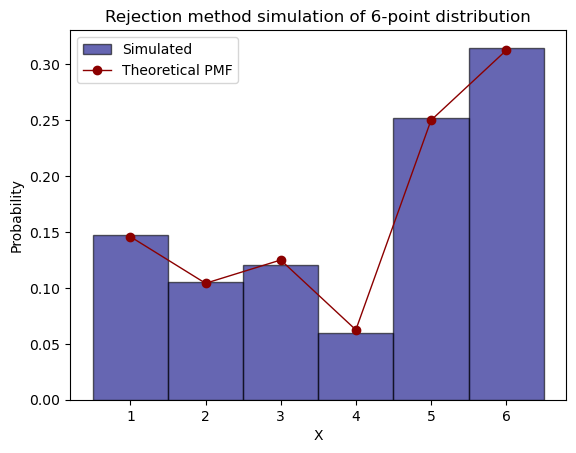

Chi-square test:
Statistic = 4.2080
p-value   = 0.5199


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

np.random.seed(237)

# Target distribution
X_values = np.array([1, 2, 3, 4, 5, 6])
p = np.array([7, 5, 6, 3, 12, 15]) / 48
q = np.ones(6) / 6
c = max(p / q)  # = 1.875

# Rejection sampling
n_samples = 10000
samples = []

while len(samples) < n_samples:
    x = np.random.randint(1, 7)  # Proposal from uniform 1-6
    u = np.random.rand()
    accept_prob = (p[x-1] / q[x-1]) / c
    if u <= accept_prob:
        samples.append(x)

samples = np.array(samples)

# Plot histogram
plt.hist(samples, bins=np.arange(1, 8)-0.5, edgecolor='black', density=True, label='Simulated', alpha=0.6, color='navy')
plt.xticks(X_values)
plt.plot(X_values, p, 'o-', label='Theoretical PMF', color='darkred', linewidth=1)
plt.title('Rejection method simulation of 6-point distribution')
plt.xlabel('X')
plt.ylabel('Probability')
plt.legend()
plt.show()

# Chi-square test
observed_counts = np.array([(samples == x).sum() for x in X_values])
expected_counts = p * n_samples
chi_stat, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)

print("Chi-square test:")
print(f"Statistic = {chi_stat:.4f}")
print(f"p-value   = {p_value:.4f}")


#### Øvelse 2c

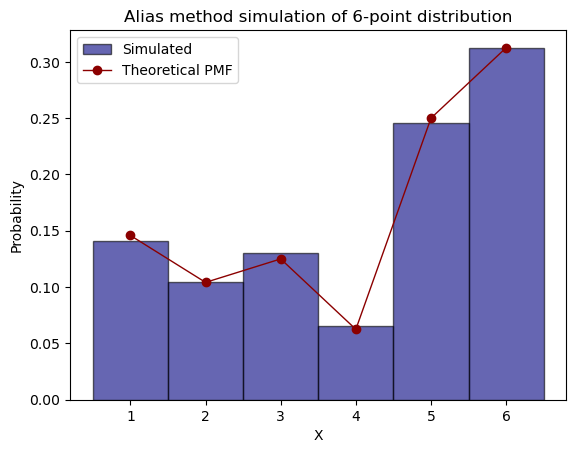

Chi-square test:
Statistic = 6.2063
p-value   = 0.2867


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

np.random.seed(237)

# Original distribution
X_values = np.array([1, 2, 3, 4, 5, 6])
probs = np.array([7, 5, 6, 3, 12, 15]) / 48
k = len(probs)

# Step 1: Create alias tables
F = probs * k  # Scaled probabilities
L = np.arange(k)  # Initialize alias table

# Work lists
small = [i for i in range(k) if F[i] < 1]
large = [i for i in range(k) if F[i] >= 1]

while small and large:
    s = small.pop()
    l = large.pop()

    L[s] = l
    F[l] = F[l] - (1 - F[s])

    if F[l] < 1:
        small.append(l)
    else:
        large.append(l)

# Step 2: Sampling function
def alias_sample(n, F, L):
    samples = np.zeros(n, dtype=int)
    for i in range(n):
        I = int(np.floor(k * np.random.rand()))
        U = np.random.rand()
        if U < F[I]:
            samples[i] = I + 1
        else:
            samples[i] = L[I] + 1
    return samples

# Run simulation
n_samples = 10000
samples = alias_sample(n_samples, F, L)

# Histogram and comparison
plt.hist(samples, bins=np.arange(1, 8)-0.5, density=True, edgecolor='black', label='Simulated', alpha=0.6, color='navy')
plt.plot(X_values, probs, 'o-', label='Theoretical PMF', color='darkred', linewidth=1)
plt.xticks(X_values)
plt.title('Alias method simulation of 6-point distribution')
plt.xlabel('X')
plt.ylabel('Probability')
plt.legend()
plt.show()

# Chi-square test
observed_counts = np.array([(samples == x).sum() for x in X_values])
expected_counts = probs * n_samples
chi_stat, p_val = chisquare(observed_counts, expected_counts)

print("Chi-square test:")
print(f"Statistic = {chi_stat:.4f}")
print(f"p-value   = {p_val:.4f}")


## Exercise 3

#### Øvelse 1